<a href="https://colab.research.google.com/github/geoncoder/colab-computer-vision/blob/main/Assignment4_Turner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

cuda:0
Files already downloaded and verified
Files already downloaded and verified


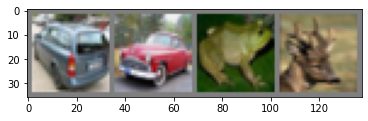

  car   car  frog  deer
[1,  2000] loss: 2.164
[1,  4000] loss: 1.859
[1,  6000] loss: 1.693
[1,  8000] loss: 1.621
[1, 10000] loss: 1.541
[1, 12000] loss: 1.506
[2,  2000] loss: 1.472
[2,  4000] loss: 1.397
[2,  6000] loss: 1.416
[2,  8000] loss: 1.376
[2, 10000] loss: 1.361
[2, 12000] loss: 1.340
[3,  2000] loss: 1.296
[3,  4000] loss: 1.293
[3,  6000] loss: 1.269
[3,  8000] loss: 1.229
[3, 10000] loss: 1.253
[3, 12000] loss: 1.222
[4,  2000] loss: 1.209
[4,  4000] loss: 1.179
[4,  6000] loss: 1.179
[4,  8000] loss: 1.174
[4, 10000] loss: 1.147
[4, 12000] loss: 1.114
[5,  2000] loss: 1.105
[5,  4000] loss: 1.117
[5,  6000] loss: 1.107
[5,  8000] loss: 1.128
[5, 10000] loss: 1.082
[5, 12000] loss: 1.097
Finishing Training


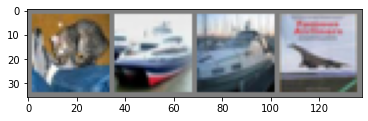

GroundTruth:    cat  ship  ship plane
Predicted:    cat  ship  ship  ship
Correct is 5841, Total is 10000
Accuracy of the network on the 10000 test images: 58 %
Accuracy of plane : 77 %
Accuracy of   car : 57 %
Accuracy of  bird : 39 %
Accuracy of   cat : 54 %
Accuracy of  deer : 38 %
Accuracy of   dog : 47 %
Accuracy of  frog : 65 %
Accuracy of horse : 58 %
Accuracy of  ship : 73 %
Accuracy of truck : 77 %


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
  img = img / 2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))
  plt.show()

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    #self.conv1 = nn.Conv2d(3, 16, 5)
    self.conv1 = nn.Conv2d(3, 32, 5)
    #self.conv2 = nn.Conv2d(16, 16, 5)
    self.conv2 = nn.Conv2d(32, 16, 5)
    self.conv2_drop = nn.Dropout2d()
    self.pool = nn.MaxPool2d((2,2))
    #self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)

    #self.fc2 = nn.Linear(120, 84)
    self.fc2 = nn.Linear(120, 84)

    self.fc3 = nn.Linear(84, 10)
    
  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    #x = x.view(-1, 16 * 5 * 5)
    x = x.view(-1, 16 * 5 * 5)
    x = F.relu(self.fc1(x))
    x = F.dropout(x, training=self.training)
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

net = Net()

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
net.to(device)

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]
)

bs = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
#trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
#                                          shuffle=True, num_workers=2)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=bs,
                                          shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
#testloader = torch.utils.data.DataLoader(testset, batch_size=4,
#                                         shuffle=False, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=bs,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

#show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(bs)))

criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

#for epoch in range(2):
for epoch in range(5):
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    # get the inputs; data is a list of [inputs, labels]
    inputs, labels = data[0].to(device), data[1].to(device)
    
    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    # print statistics
    running_loss += loss.item()
    if i % 2000 == 1999:  # print every 2000 mini-batches
        print('[%d, %5d] loss: %.3f' %
            (epoch + 1, i + 1, running_loss / 2000))
        running_loss = 0.0

print('Finishing Training')

# Apply the training network to a few test examples

dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

#net = Net()
#net.load_state_dict(torch.load(PATH))
images = images.to(device);
outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

# Apply the trained network to the entire test set
correct = 0
total = 0
with torch.no_grad():
  for data in testloader:
    images, labels = data[0].to(device), data[1].to(device)
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('Correct is %d, Total is %d' % (correct, total))
print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

# Check the accuracy of each class
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
  for data in testloader:
    images, labels = data[0].to(device), data[1].to(device)
    outputs = net(images)
    _, predicted = torch.max(outputs, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
      label = labels[i]
      class_correct[label] += c[i].item()
      class_total[label] += 1

for i in range(10):
  print('Accuracy of %5s : %2d %%' % (
      classes[i], 100 * class_correct[i] / class_total[i]))

